In [ ]:
%load_ext tensorboard

In [110]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import keras_tuner as kt
from keras.backend import backend

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from tvDatafeed import TvDatafeed, Interval

import datetime

In [25]:
batch_size=32
dir_log="../models/"+ datetime.datetime.now().strftime("%d-%h-%H.%M")
dir_log

'../models/26-Nov-10.49'

In [4]:
username = 'rheyhantensor'
password = '$Acong091283'
tv = TvDatafeed(username, password)

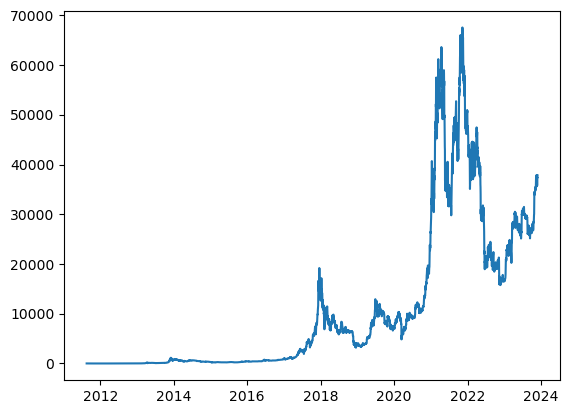

In [107]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(df.values.reshape(-1,1))
df=scaler.transform(df.values.reshape(-1,1))

In [114]:
#create model
class modelmaker():
    def __init__(self, interval=[Interval.in_daily, Interval.in_weekly, Interval.in_monthly]):
        self.data=tv.get_hist(symbol='BTCUSD',exchange='BITSTAMP',interval=interval, n_bars=100000).iloc[:,1]
        self.scaler()
        
    def scaler(self):
        self.scaler = MinMaxScaler(feature_range=(0, 1))
        self.scaler.fit(self.data.values.reshape(-1,1))
        self.scaled_data=self.scaler.transform(self.data.values.reshape(-1,1))
    
    def traintestsplit(self, train_size):
        
        
    def tensorboardlogger():
        return [keras.callbacks.ModelCheckpoint(dir_log+"/callbacks", save_weights_only=True),
                tf.keras.callbacks.TensorBoard(dir_log)]
        
    class SelectiveProgbarLogger(tf.keras.callbacks.ProgbarLogger):
        def __init__(self, verbose, totepochs, epoch_interval, *args, **kwargs):
            super().__init__(*args, **kwargs)
            self.default_verbose = verbose
            self.epoch_interval = epoch_interval
            self.totepochs=totepochs
        
        def on_epoch_begin(self, epoch, *args, **kwargs):
            self.verbose = (
                0 
                    if epoch % self.epoch_interval != 0 
                    else self.default_verbose
            )
            if epoch==self.totepochs-1:
                clear_output()
            super().on_epoch_begin(epoch, *args, **kwargs)
                
    def getmodel_compile():
        model=keras.Sequential([
            
            keras.layers.LSTM(4, input_shape=(self.t, 1), return_sequences=True), 
            keras.layers.LSTM(8), 
            keras.layers.Dense(1)])
        
        model.compile(loss='mean_squared_error', optimizer='adam', metrics=[keras.metrics.MeanAbsoluteError(), keras.metrics.MeanAbsolutePercentageError()])
        return model
    
    def fit(self, epochs):
        epoch=1000
        self.thehistory=self.model.fit(trainX, trainY, epochs=epoch, validation_data=(testX, testY), 
                             batch_size=batch_size, verbose=0,
                             callbacks=[self.tensorboardlogger(), self.SelectiveProgbarLogger(verbose=1, epoch_interval=1, totepochs=epoch)])

In [117]:
asu=modelmaker(Interval.in_daily).data

In [129]:
train=asu.iloc[:int(0.8*len(asu))]
test=asu.iloc[int(0.8*len(asu)):]

Text(0, 0.5, 'Price ($)')

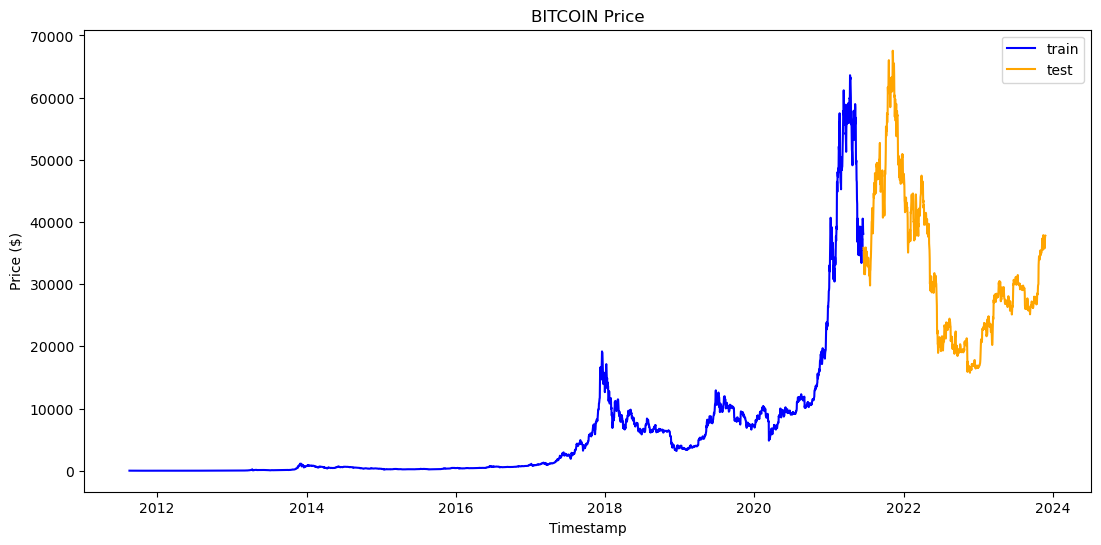

In [135]:
fig, ax = plt.subplots(1,1 , figsize=(13,6))
ax.plot(train, c="blue", label="train")
ax.plot(test, c="orange", label="test")
ax.legend(loc="upper right")
ax.set_title("BITCOIN Price")
ax.set_xlabel("Timestamp")
ax.set_ylabel("Price ($)")